<a href="https://colab.research.google.com/github/Vinooj/Data-Engineering-for-ETL/blob/main/Excercise.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Data Engineering for ETL: Data Ingestion**

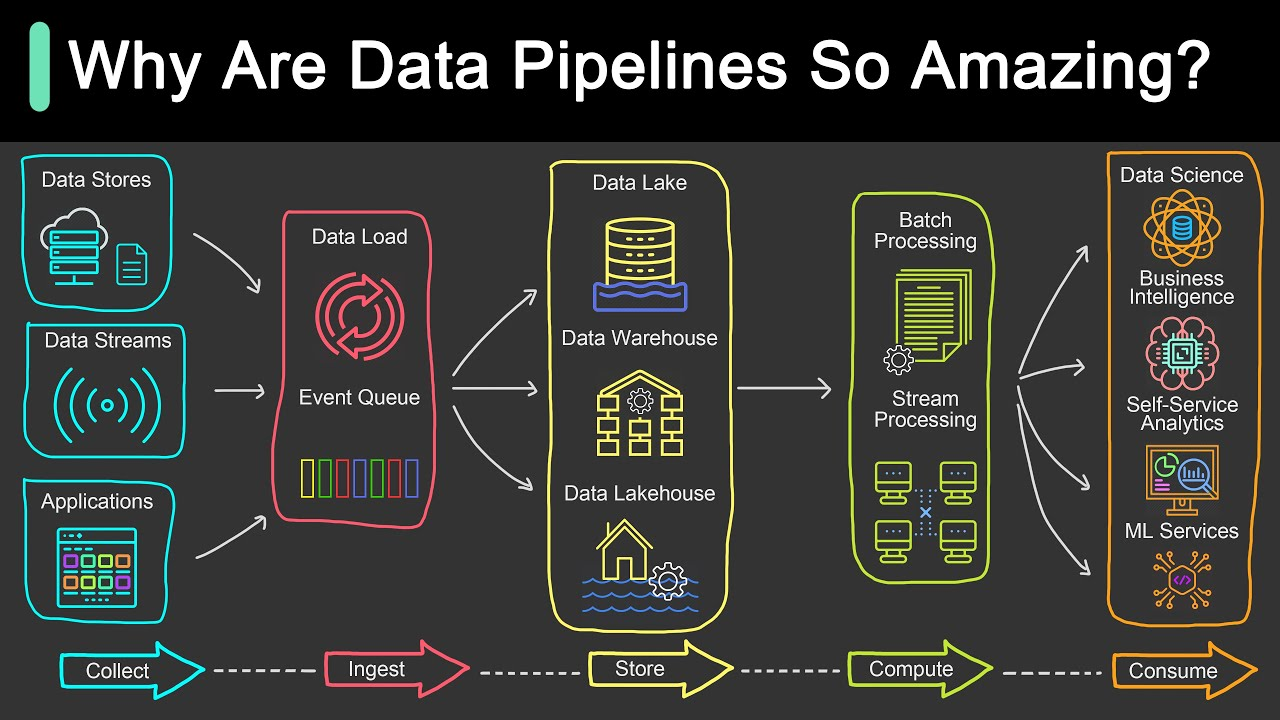

## **What you’ll learn (6 essential skills)**

🎯 1. Extracting Data from APIs & Handling API Challenges – Work with REST APIs, authentication, rate limits, retries, and pagination to extract data efficiently.

🎯 2. Schema Management & Automatic Normalization – Use dlt to infer schemas, flatten nested JSON, extract lists into child tables, and handle schema evolution automatically.

🎯 3. Incremental Data Extraction & State Tracking – Load only new or modified records, avoiding unnecessary reprocessing and improving pipeline efficiency.

🎯 4. Loading Data into Various Destinations – Store data in DuckDB, BigQuery, Snowflake, or a Data Lake while ensuring efficient schema mapping and performance.

🎯 5. Automating & Orchestrating Pipelines – Deploy, schedule, and maintain ingestion workflows with Dagster, GitHub Actions, and Cron Jobs.

🎯 6. Scaling Data Pipelines Efficiently – Handle large-scale data ingestion while optimizing performance, retries, and parallel execution.

---
After this course, you won’t just ‘know’ ingestion — you’ll be able to build an API ingestion pipeline that **auto-detects schema changes, retries intelligently, and scales with demand.**



In [2]:
import requests
import json

def fetch_batch_data():
    url = "https://api.github.com/repos/DataTalksClub/data-engineering-zoomcamp/events"
    response = requests.get(url)
    data = response.json()

    with open("daily_report.json", "w") as file:
        json.dump(data, file)

def display_json_data():
     with open("daily_report.json", "r") as file:
         data = json.load(file)

     print(data)

fetch_batch_data()
display_json_data()

[{'id': '48938702245', 'type': 'WatchEvent', 'actor': {'id': 15896210, 'login': 'vveka', 'display_login': 'vveka', 'gravatar_id': '', 'url': 'https://api.github.com/users/vveka', 'avatar_url': 'https://avatars.githubusercontent.com/u/15896210?'}, 'repo': {'id': 419661684, 'name': 'DataTalksClub/data-engineering-zoomcamp', 'url': 'https://api.github.com/repos/DataTalksClub/data-engineering-zoomcamp'}, 'payload': {'action': 'started'}, 'public': True, 'created_at': '2025-04-22T16:57:51Z', 'org': {'id': 72699292, 'login': 'DataTalksClub', 'gravatar_id': '', 'url': 'https://api.github.com/orgs/DataTalksClub', 'avatar_url': 'https://avatars.githubusercontent.com/u/72699292?'}}, {'id': '48934916230', 'type': 'WatchEvent', 'actor': {'id': 66478298, 'login': 'antmamede', 'display_login': 'antmamede', 'gravatar_id': '', 'url': 'https://api.github.com/users/antmamede', 'avatar_url': 'https://avatars.githubusercontent.com/u/66478298?'}, 'repo': {'id': 419661684, 'name': 'DataTalksClub/data-engine

In [3]:
# How to use Rate linit end point . eg: is for Github
import time
import requests


response = requests.get("https://api.github.com/rate_limit")
print (response.json())
rate_limit = response.json()["rate"]["remaining"]
print("The rate limit remains: ", rate_limit)

#Handle API calss as we reach the rate_limit
if rate_limit == 0:
    time.sleep(60)  # Wait before making more requests

{'resources': {'core': {'limit': 60, 'remaining': 59, 'reset': 1745365961, 'used': 1, 'resource': 'core'}, 'graphql': {'limit': 0, 'remaining': 0, 'reset': 1745365961, 'used': 0, 'resource': 'graphql'}, 'integration_manifest': {'limit': 5000, 'remaining': 5000, 'reset': 1745365961, 'used': 0, 'resource': 'integration_manifest'}, 'search': {'limit': 10, 'remaining': 10, 'reset': 1745362421, 'used': 0, 'resource': 'search'}}, 'rate': {'limit': 60, 'remaining': 59, 'reset': 1745365961, 'used': 1, 'resource': 'core'}}
The rate limit remains:  59


In [4]:
# How to pass Authorization header in API request
# GITHUB_API_TOKEN is created in Google collab, by creating a new secret
import requests
from google.colab import userdata
API_TOKEN = userdata.get('GITHUB_API_TOKEN')

headers = {
    "Authorization": f"Bearer {API_TOKEN}"
}

response = requests.get("https://api.github.com/user",headers=headers)
response.json()

{'login': 'Vinooj',
 'id': 7462980,
 'node_id': 'MDQ6VXNlcjc0NjI5ODA=',
 'avatar_url': 'https://avatars.githubusercontent.com/u/7462980?v=4',
 'gravatar_id': '',
 'url': 'https://api.github.com/users/Vinooj',
 'html_url': 'https://github.com/Vinooj',
 'followers_url': 'https://api.github.com/users/Vinooj/followers',
 'following_url': 'https://api.github.com/users/Vinooj/following{/other_user}',
 'gists_url': 'https://api.github.com/users/Vinooj/gists{/gist_id}',
 'starred_url': 'https://api.github.com/users/Vinooj/starred{/owner}{/repo}',
 'subscriptions_url': 'https://api.github.com/users/Vinooj/subscriptions',
 'organizations_url': 'https://api.github.com/users/Vinooj/orgs',
 'repos_url': 'https://api.github.com/users/Vinooj/repos',
 'events_url': 'https://api.github.com/users/Vinooj/events{/privacy}',
 'received_events_url': 'https://api.github.com/users/Vinooj/received_events',
 'type': 'User',
 'user_view_type': 'private',
 'site_admin': False,
 'name': None,
 'company': None,
 'b

In [8]:
# How to uspport pagination
import requests
from google.colab import userdata

API_TOKEN = userdata.get('GITHUB_API_TOKEN')
BASE_URL = "https://api.github.com/repos/DataTalksClub/data-engineering-zoomcamp/events"
headers  = {
    "Authorization": f"Bearer {API_TOKEN}"
}

page_number = 1

while True:
    response = requests.get(BASE_URL, headers={"Authorization": f"Bearer {API_TOKEN}"})
    page_data = response.json()

    next_page = response.links.get("next", {}).get("url")

    print(f'Got page {page_number} with {len(page_data)} records')
    print(page_data)

    if not next_page:
        break

    page_number += 1
    BASE_URL = next_page

Got page 1 with 30 records
[{'id': '48938702245', 'type': 'WatchEvent', 'actor': {'id': 15896210, 'login': 'vveka', 'display_login': 'vveka', 'gravatar_id': '', 'url': 'https://api.github.com/users/vveka', 'avatar_url': 'https://avatars.githubusercontent.com/u/15896210?'}, 'repo': {'id': 419661684, 'name': 'DataTalksClub/data-engineering-zoomcamp', 'url': 'https://api.github.com/repos/DataTalksClub/data-engineering-zoomcamp'}, 'payload': {'action': 'started'}, 'public': True, 'created_at': '2025-04-22T16:57:51Z', 'org': {'id': 72699292, 'login': 'DataTalksClub', 'gravatar_id': '', 'url': 'https://api.github.com/orgs/DataTalksClub', 'avatar_url': 'https://avatars.githubusercontent.com/u/72699292?'}}, {'id': '48934916230', 'type': 'WatchEvent', 'actor': {'id': 66478298, 'login': 'antmamede', 'display_login': 'antmamede', 'gravatar_id': '', 'url': 'https://api.github.com/users/antmamede', 'avatar_url': 'https://avatars.githubusercontent.com/u/66478298?'}, 'repo': {'id': 419661684, 'name':

In [9]:
response = requests.get(BASE_URL, headers={"Authorization": f"Bearer {API_TOKEN}"})
page_data = response.json()

response.links

{'prev': {'url': 'https://api.github.com/repositories/419661684/events?page=9',
  'rel': 'prev'},
 'first': {'url': 'https://api.github.com/repositories/419661684/events?page=1',
  'rel': 'first'}}

In [11]:
# The snippet below demonstrates streaming (chunked) data processing,
# where data is processed in small batches instead of loading everything
# into memory at once. This method helps optimize performance and reduce
# memory usage from itertools import islice
from itertools import islice

# This function creates a generator that produces limit number of dictionaries.
def get_rows(limit):
    # Instead of storing all rows in memory, it yields one row at a time (lazy evaluation).
    yield from map(lambda n: {"row": n}, range(limit))


def data_chunked():
    rows = get_rows(10000)

    # Uses islice(rows, 1000) to take chunks of 1,000 rows at a time.
    while item_slice := list(islice(rows, 1000)):
        print(f"Got chunk of length {len(item_slice)}")
        # Each chunk is yielded as a list for further processing.
        yield item_slice


data = next(data_chunked())

Got chunk of length 1000


In [12]:
# This code snippet demonstrates the use of
# generators in Python using the yield keyword.
def get_counts():
    for i in range(1, 11):
        """
        yield i: This is the key part that makes this function a generator.
        Instead of returning a single value using return, the yield keyword produces a sequence of values one by one.
        Each time the loop reaches yield i, it pauses and yields the current value of i.
        The next time the generator is called, it resumes from where it left off and continues to the next iteration.
        """
        yield i

for i in get_counts():
  print(i)

1
2
3
4
5
6
7
8
9
10


In [13]:
import requests
from google.colab import userdata

API_TOKEN = userdata.get('GITHUB_API_TOKEN')
BASE_URL = "https://api.github.com/repos/DataTalksClub/data-engineering-zoomcamp/events"


def events_getter():
    page_number = 1
    url = BASE_URL

    while True:
        response = requests.get(url, headers={"Authorization": f"Bearer {API_TOKEN}"})
        page_data = response.json()
        yield page_data

        next_page = response.links.get("next", {}).get("url")

        if not next_page:
            break

        page_number += 1
        url = next_page


for events_page in events_getter():
    print(events_page)

[{'id': '48938702245', 'type': 'WatchEvent', 'actor': {'id': 15896210, 'login': 'vveka', 'display_login': 'vveka', 'gravatar_id': '', 'url': 'https://api.github.com/users/vveka', 'avatar_url': 'https://avatars.githubusercontent.com/u/15896210?'}, 'repo': {'id': 419661684, 'name': 'DataTalksClub/data-engineering-zoomcamp', 'url': 'https://api.github.com/repos/DataTalksClub/data-engineering-zoomcamp'}, 'payload': {'action': 'started'}, 'public': True, 'created_at': '2025-04-22T16:57:51Z', 'org': {'id': 72699292, 'login': 'DataTalksClub', 'gravatar_id': '', 'url': 'https://api.github.com/orgs/DataTalksClub', 'avatar_url': 'https://avatars.githubusercontent.com/u/72699292?'}}, {'id': '48934916230', 'type': 'WatchEvent', 'actor': {'id': 66478298, 'login': 'antmamede', 'display_login': 'antmamede', 'gravatar_id': '', 'url': 'https://api.github.com/users/antmamede', 'avatar_url': 'https://avatars.githubusercontent.com/u/66478298?'}, 'repo': {'id': 419661684, 'name': 'DataTalksClub/data-engine

In [14]:
event = events_page[0]
event

{'id': '48582883094',
 'type': 'WatchEvent',
 'actor': {'id': 145156793,
  'login': 'SaiChandra1011',
  'display_login': 'SaiChandra1011',
  'gravatar_id': '',
  'url': 'https://api.github.com/users/SaiChandra1011',
  'avatar_url': 'https://avatars.githubusercontent.com/u/145156793?'},
 'repo': {'id': 419661684,
  'name': 'DataTalksClub/data-engineering-zoomcamp',
  'url': 'https://api.github.com/repos/DataTalksClub/data-engineering-zoomcamp'},
 'payload': {'action': 'started'},
 'public': True,
 'created_at': '2025-04-11T11:38:36Z',
 'org': {'id': 72699292,
  'login': 'DataTalksClub',
  'gravatar_id': '',
  'url': 'https://api.github.com/orgs/DataTalksClub',
  'avatar_url': 'https://avatars.githubusercontent.com/u/72699292?'}}

In [15]:
event.keys()

dict_keys(['id', 'type', 'actor', 'repo', 'payload', 'public', 'created_at', 'org'])

In [16]:
def process_event(event):
  result = {}

  result['id'] = event['id']
  result['type'] = event['type']
  result['public'] = event['public']
  result['created_at'] = event['created_at']

  result['actor__id'] = event['actor']['id']
  result['actor__login'] = event['actor']['login']

  return result

In [17]:
process_event(event)

{'id': '48582883094',
 'type': 'WatchEvent',
 'public': True,
 'created_at': '2025-04-11T11:38:36Z',
 'actor__id': 145156793,
 'actor__login': 'SaiChandra1011'}

In [18]:
processed_events = []

for event in events_page:
  processed_event = process_event(event)
  processed_events.append(processed_event)

processed_events

[{'id': '48582883094',
  'type': 'WatchEvent',
  'public': True,
  'created_at': '2025-04-11T11:38:36Z',
  'actor__id': 145156793,
  'actor__login': 'SaiChandra1011'},
 {'id': '48580353559',
  'type': 'WatchEvent',
  'public': True,
  'created_at': '2025-04-11T10:24:20Z',
  'actor__id': 6486878,
  'actor__login': 'evanalyticsalex'},
 {'id': '48579003162',
  'type': 'WatchEvent',
  'public': True,
  'created_at': '2025-04-11T09:48:28Z',
  'actor__id': 121918108,
  'actor__login': 'EgonLh'},
 {'id': '48574605783',
  'type': 'WatchEvent',
  'public': True,
  'created_at': '2025-04-11T07:52:42Z',
  'actor__id': 102226338,
  'actor__login': 'mafaldareispereira'},
 {'id': '48567974509',
  'type': 'WatchEvent',
  'public': True,
  'created_at': '2025-04-11T03:19:14Z',
  'actor__id': 173019491,
  'actor__login': 'career-coach-ai'},
 {'id': '48567148961',
  'type': 'ForkEvent',
  'public': True,
  'created_at': '2025-04-11T02:34:09Z',
  'actor__id': 15003627,
  'actor__login': 'KalebLaBarrie'},

In [19]:
from datetime import datetime

def process_event(event):
  result = {}

  result['id'] = event['id']
  result['type'] = event['type']
  result['public'] = event['public']

  #formatted as Unix timestamp
  result['created_at'] = datetime.fromisoformat(event['created_at']).timestamp()

  result['actor__id'] = event['actor']['id']
  result['actor__login'] = event['actor']['login']

  return result


process_event(event)

{'id': '48484190743',
 'type': 'ForkEvent',
 'public': True,
 'created_at': 1744188231.0,
 'actor__id': 158574376,
 'actor__login': 'NasrinMokhtarian'}

In [20]:
all_data = []

pages = events_getter()

for page in pages:
  all_data.extend(page)

len(all_data)

296

In [21]:
def process_event(event):
  result = {}

  result['id'] = event['id']
  result['type'] = event['type']
  result['public'] = event['public']

  parsed_timestamp = datetime.fromisoformat(event['created_at'])
  result['created_at'] = parsed_timestamp.timestamp()

  result['actor__id'] = event['actor']['id']
  result['actor__login'] = event['actor']['login']

  topics = event.get('payload', {}).get('pull_request', {}).get('base', {}).get('repo', {}).get('topics', [])

  processed_topics = []
  for topic in topics:
    processed_topic = {
        'event_id': event['id'],
        'topic_name': topic
    }
    processed_topics.append(processed_topic)

  return result, processed_topics

In [22]:
processed_events = []
processed_topics = []

for event in all_data:
  processed_event, topics = process_event(event)
  processed_events.append(processed_event)
  processed_topics.extend(topics)

print(processed_events[:6])
print(processed_topics[:6])

[{'id': '48938702245', 'type': 'WatchEvent', 'public': True, 'created_at': 1745341071.0, 'actor__id': 15896210, 'actor__login': 'vveka'}, {'id': '48934916230', 'type': 'WatchEvent', 'public': True, 'created_at': 1745335228.0, 'actor__id': 66478298, 'actor__login': 'antmamede'}, {'id': '48933250922', 'type': 'WatchEvent', 'public': True, 'created_at': 1745333053.0, 'actor__id': 106429306, 'actor__login': 'sachindpatil94'}, {'id': '48928955340', 'type': 'WatchEvent', 'public': True, 'created_at': 1745327585.0, 'actor__id': 25063313, 'actor__login': 'AangInThere'}, {'id': '48928334178', 'type': 'ForkEvent', 'public': True, 'created_at': 1745326765.0, 'actor__id': 39381546, 'actor__login': 'Adityagurung'}, {'id': '48926617395', 'type': 'WatchEvent', 'public': True, 'created_at': 1745324377.0, 'actor__id': 39381546, 'actor__login': 'Adityagurung'}]
[]


In [23]:
import duckdb

# 1. Create a connection to a DuckDB database
conn = duckdb.connect("github_events.db")


# 2. Create the `github_events` Table
conn.execute("""
CREATE TABLE IF NOT EXISTS github_events (
    id TEXT PRIMARY KEY,
    type TEXT,
    public BOOLEAN,
    created_at DOUBLE,
    actor__id BIGINT,
    actor__login TEXT
);
""")

flattened_data = [
    (
        record["id"],
        record["type"],
        record["public"],
        record["created_at"],
        record["actor__id"],
        record["actor__login"]
    )
    for record in processed_events
]

# 3. Insert Data into the `github_events` Table
conn.executemany("""
INSERT INTO github_events (id, type, public, created_at, actor__id, actor__login)
VALUES (?, ?, ?, ?, ?, ?)
ON CONFLICT (id) DO NOTHING;
""", flattened_data)

print("Data successfully loaded into DuckDB!")


# Query and Print Data
df = conn.execute("SELECT * FROM github_events").df()

conn.close()

print("\nGitHub Events Data:")
df

Data successfully loaded into DuckDB!

GitHub Events Data:


,id,type,public,created_at,actor__id,actor__login
0,48938702245,WatchEvent,True,1.745341e+09,15896210,vveka
1,48934916230,WatchEvent,True,1.745335e+09,66478298,antmamede
2,48933250922,WatchEvent,True,1.745333e+09,106429306,sachindpatil94
3,48928955340,WatchEvent,True,1.745328e+09,25063313,AangInThere
4,48928334178,ForkEvent,True,1.745327e+09,39381546,Adityagurung
...,...,...,...,...,...,...
291,48503534050,WatchEvent,True,1.744215e+09,173515498,DaveDevSB
292,48500232069,WatchEvent,True,1.744210e+09,12392903,BetterLuke
293,48494450015,WatchEvent,True,1.744203e+09,54040929,LucaBRS
294,48484743474,WatchEvent,True,1.744189e+09,75806093,fabriziocominetti


In [25]:
def process_event(event):
  result = {}

  result['id'] = event['id']
  result['type'] = event['type']
  result['public'] = event['public']

  parsed_timestamp = datetime.fromisoformat(event['created_at'])
  result['created_at'] = parsed_timestamp.timestamp()

  result['actor__id'] = event['actor']['id']
  result['actor__login'] = event['actor']['login']

  result['repo__id'] = event['repo']['id']

  topics = event.get('payload', {}).get('pull_request', {}).get('base', {}).get('repo', {}).get('topics', [])

  processed_topics = []
  for topic in topics:
    processed_topic = {
        'event_id': event['id'],
        'topic_name': topic
    }
    processed_topics.append(processed_topic)

  return result, processed_topics

In [26]:
processed_events = []
processed_topics = []

for event in all_data:
  processed_event, topics = process_event(event)
  processed_events.append(processed_event)
  processed_topics.extend(topics)

print(processed_events[:5])
print(processed_topics[:5])

[{'id': '48938702245', 'type': 'WatchEvent', 'public': True, 'created_at': 1745341071.0, 'actor__id': 15896210, 'actor__login': 'vveka', 'repo__id': 419661684}, {'id': '48934916230', 'type': 'WatchEvent', 'public': True, 'created_at': 1745335228.0, 'actor__id': 66478298, 'actor__login': 'antmamede', 'repo__id': 419661684}, {'id': '48933250922', 'type': 'WatchEvent', 'public': True, 'created_at': 1745333053.0, 'actor__id': 106429306, 'actor__login': 'sachindpatil94', 'repo__id': 419661684}, {'id': '48928955340', 'type': 'WatchEvent', 'public': True, 'created_at': 1745327585.0, 'actor__id': 25063313, 'actor__login': 'AangInThere', 'repo__id': 419661684}, {'id': '48928334178', 'type': 'ForkEvent', 'public': True, 'created_at': 1745326765.0, 'actor__id': 39381546, 'actor__login': 'Adityagurung', 'repo__id': 419661684}]
[]


In [27]:
import duckdb

# 1. Create a connection to DuckDB
conn = duckdb.connect("github_events.db")


# 2. Fetch current table schema
current_columns = {row[1] for row in conn.execute("PRAGMA table_info(github_events)").fetchall()}
print(current_columns)

# 3. Detect and add new columns dynamically
for record in processed_events:
    for key in record.keys():
        if key not in current_columns:
            col_type = "TEXT"  # Default type
            if isinstance(record[key], bool):
                col_type = "BOOLEAN"
            elif isinstance(record[key], int):
                col_type = "BIGINT"
            elif isinstance(record[key], float):
                col_type = "DOUBLE"
            print(f"ALTER TABLE github_events ADD COLUMN {key} {col_type};")
            alter_query = f"ALTER TABLE github_events ADD COLUMN {key} {col_type};"
            conn.execute(alter_query)
            print(f"Added new column: {key} ({col_type})")
            current_columns.add(key)  # Update schema tracking

# 4. Prepare data for insertion (handle missing fields)
columns = sorted(current_columns)  # Maintain consistent order
flattened_data = [
    tuple(record.get(col, None) for col in columns)  # Fill missing values with NULL
    for record in processed_events
]

# 5. Construct dynamic SQL for insertion
placeholders = ", ".join(["?" for _ in columns])
columns_str = ", ".join(columns)

insert_query = f"""
INSERT INTO github_events ({columns_str})
VALUES ({placeholders})
ON CONFLICT (id) DO UPDATE SET {", ".join(f"{col}=excluded.{col}" for col in columns if col != "id")};
"""

# 6. Insert data into DuckDB
conn.executemany(insert_query, flattened_data)
print("Data successfully loaded into DuckDB with schema updates!")

# 7. Query the table
df = conn.execute("""SELECT * FROM github_events""").df()

conn.close()

print("\nGitHub Events Data:")
df

{'type', 'actor__id', 'public', 'created_at', 'actor__login', 'id'}
ALTER TABLE github_events ADD COLUMN repo__id BIGINT;
Added new column: repo__id (BIGINT)
Data successfully loaded into DuckDB with schema updates!

GitHub Events Data:


,id,type,public,created_at,actor__id,actor__login,repo__id
0,48938702245,WatchEvent,True,1.745341e+09,15896210,vveka,419661684
1,48934916230,WatchEvent,True,1.745335e+09,66478298,antmamede,419661684
2,48933250922,WatchEvent,True,1.745333e+09,106429306,sachindpatil94,419661684
3,48928955340,WatchEvent,True,1.745328e+09,25063313,AangInThere,419661684
4,48928334178,ForkEvent,True,1.745327e+09,39381546,Adityagurung,419661684
...,...,...,...,...,...,...,...
291,48503534050,WatchEvent,True,1.744215e+09,173515498,DaveDevSB,419661684
292,48500232069,WatchEvent,True,1.744210e+09,12392903,BetterLuke,419661684
293,48494450015,WatchEvent,True,1.744203e+09,54040929,LucaBRS,419661684
294,48484743474,WatchEvent,True,1.744189e+09,75806093,fabriziocominetti,419661684
